$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°3 | Visualización, pre-procesamiento de datos, creación de modelo 
y métricas de evaluación}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

#### Carga de librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importacion del dataset

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [4]:
df.isnull().any() # Se verifican que filas tienen valores nulos

id                False
sudden_fever      False
headache          False
mouth_bleed       False
nose_bleed        False
                  ...  
ulcers            False
toenail_loss      False
speech_problem    False
bullseye_rash     False
prognosis         False
Length: 66, dtype: bool

In [5]:
# Se verifican cuantos valores únicos hay en cada feature. Esto podría ayudarnos a saber
# si necesitamos un algoritmo de clasificación o regresión, además de identificar la variable Target
for col in df.columns:
      print(col, ":",df[col].nunique())

id : 707
sudden_fever : 2
headache : 2
mouth_bleed : 2
nose_bleed : 2
muscle_pain : 2
joint_pain : 2
vomiting : 2
rash : 2
diarrhea : 2
hypotension : 2
pleural_effusion : 2
ascites : 2
gastro_bleeding : 2
swelling : 2
nausea : 2
chills : 2
myalgia : 2
digestion_trouble : 2
fatigue : 2
skin_lesions : 2
stomach_pain : 2
orbital_pain : 2
neck_pain : 2
weakness : 2
back_pain : 2
weight_loss : 2
gum_bleed : 2
jaundice : 2
coma : 2
diziness : 2
inflammation : 2
red_eyes : 2
loss_of_appetite : 2
urination_loss : 2
slow_heart_rate : 2
abdominal_pain : 2
light_sensitivity : 2
yellow_skin : 2
yellow_eyes : 2
facial_distortion : 2
microcephaly : 2
rigor : 2
bitter_tongue : 2
convulsion : 2
anemia : 2
cocacola_urine : 2
hypoglycemia : 2
prostraction : 2
hyperpyrexia : 2
stiff_neck : 2
irritability : 2
confusion : 2
tremor : 2
paralysis : 2
lymph_swells : 2
breathing_restriction : 2
toe_inflammation : 2
finger_inflammation : 2
lips_irritation : 2
itchiness : 2
ulcers : 2
toenail_loss : 2
speech_pro

In [6]:
# Ahora debemos revisar si es que existen datos repetidos
df.duplicated().sum()

0

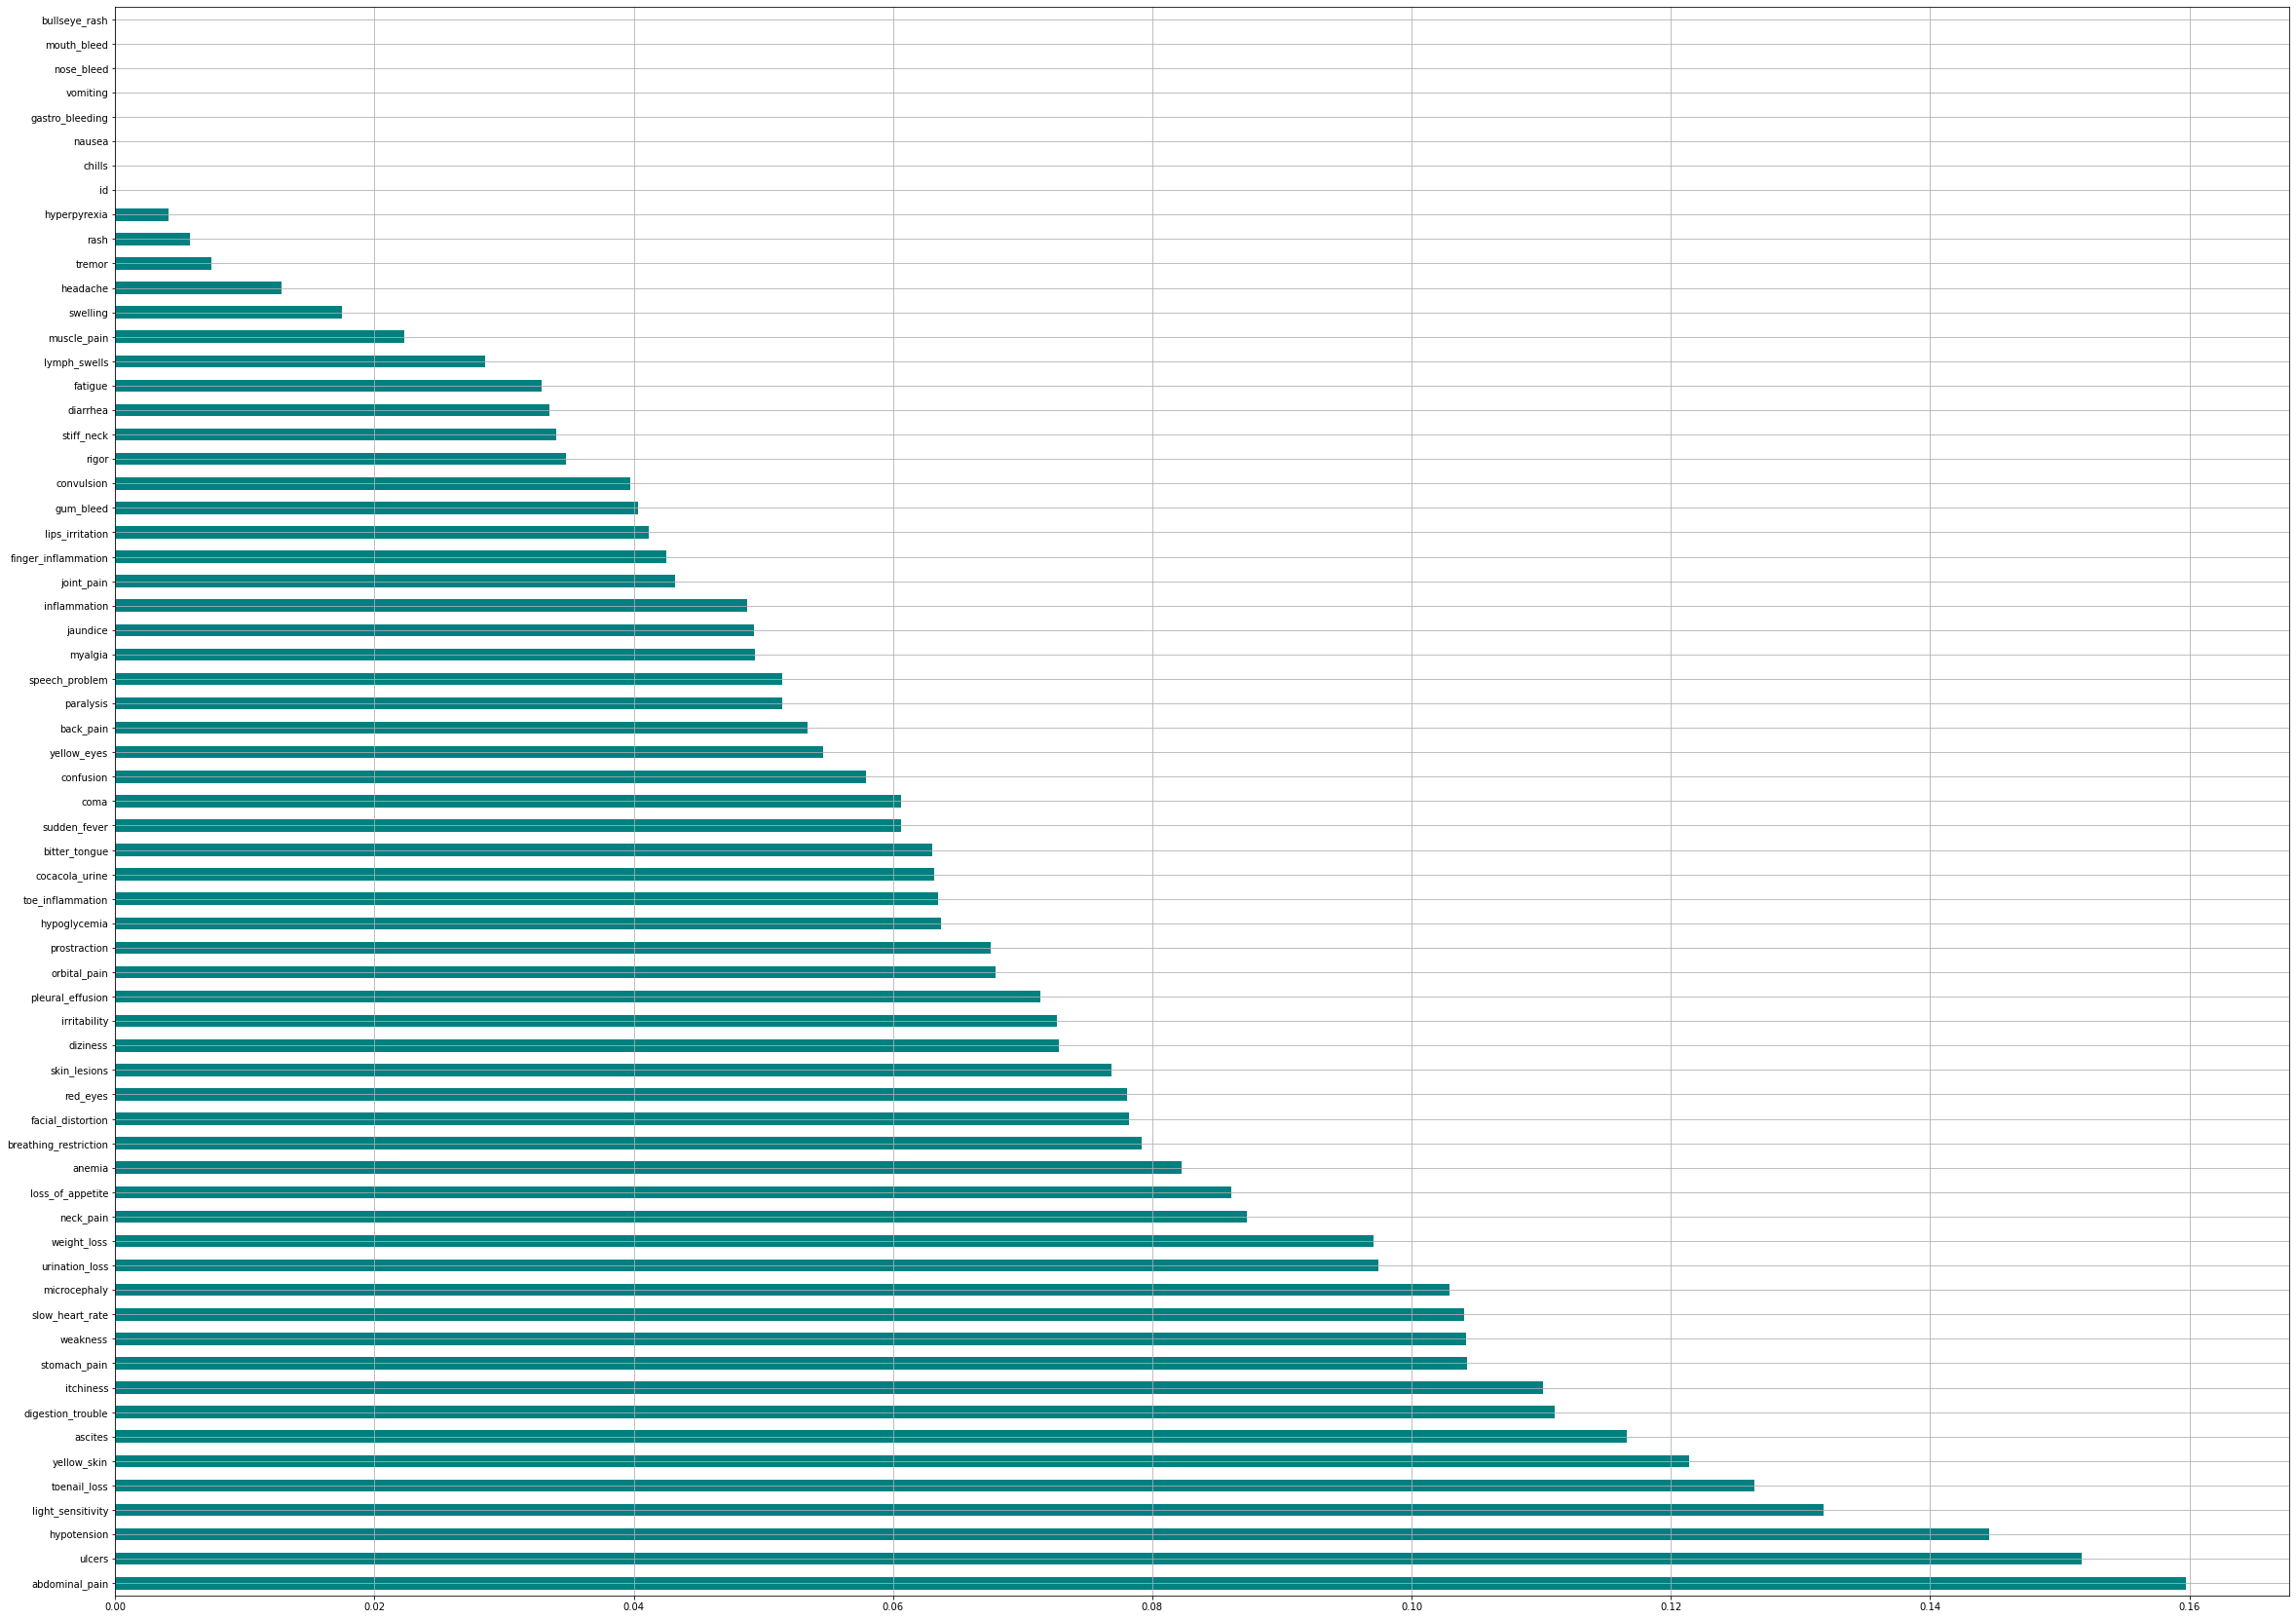

In [27]:
#Obtenemos los parametros con mayor relacion con respecto a la variable target
from sklearn.feature_selection import mutual_info_classif
plt.figure(figsize=(40,30))
importances=mutual_info_classif(df.iloc[:,:-1],df.iloc[:,-1],discrete_features=False)
feat_importances=pd.Series(importances,df.columns[:-1]) #Ordenamos de manera descendente 
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.plot(kind='barh',color='teal')
plt.grid()
plt.show()

In [44]:
feat_importances[:20] #Encontramos las 20 caracteristicas que más se relacionan con la variable Target


abdominal_pain           0.159728
ulcers                   0.151730
hypotension              0.144588
light_sensitivity        0.131808
toenail_loss             0.126432
yellow_skin              0.121413
ascites                  0.116623
digestion_trouble        0.111048
itchiness                0.110136
stomach_pain             0.104271
weakness                 0.104239
slow_heart_rate          0.104064
microcephaly             0.102927
urination_loss           0.097439
weight_loss              0.097085
neck_pain                0.087307
loss_of_appetite         0.086102
anemia                   0.082266
breathing_restriction    0.079163
facial_distortion        0.078207
dtype: float64

In [52]:
x = df[["abdominal_pain", "ulcers", "hypotension", "light_sensitivity",         
"toenail_loss", "yellow_skin", "ascites", "digestion_trouble",        
"itchiness", "stomach_pain", "weakness", "slow_heart_rate", 
"microcephaly", "urination_loss", "weight_loss", "neck_pain",                
"loss_of_appetite", "anemia", "breathing_restriction", "facial_distortion"]]
y = df [["prognosis"]]

x

,abdominal_pain,ulcers,hypotension,light_sensitivity,toenail_loss,yellow_skin,ascites,digestion_trouble,itchiness,stomach_pain,weakness,slow_heart_rate,microcephaly,urination_loss,weight_loss,neck_pain,loss_of_appetite,anemia,breathing_restriction,facial_distortion
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
703,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
704,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
705,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [54]:
df_new=pd.concat([pd.DataFrame(x,columns=["abdominal_pain", "ulcers", "hypotension", "light_sensitivity",         
"toenail_loss", "yellow_skin", "ascites", "digestion_trouble",        
"itchiness", "stomach_pain", "weakness", "slow_heart_rate", 
"microcephaly", "urination_loss", "weight_loss", "neck_pain",                
"loss_of_appetite", "anemia", "breathing_restriction", "facial_distortion"]),pd.DataFrame(y,columns=['prognosis'])],axis=1)
df_new

,abdominal_pain,ulcers,hypotension,light_sensitivity,toenail_loss,yellow_skin,ascites,digestion_trouble,itchiness,stomach_pain,...,slow_heart_rate,microcephaly,urination_loss,weight_loss,neck_pain,loss_of_appetite,anemia,breathing_restriction,facial_distortion,prognosis
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,Zika
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Plague
703,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Malaria
704,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Zika
705,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,Plague


In [55]:
#Realizamos LabelEncoding para trabajar con variables categoricas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df_new.columns: 
    if df_new[col].dtype == 'object':
        df_new[col] = encoder.fit_transform(df_new[col].values) # realizamos un labelEncoding a la variable target
df_new.head()

,abdominal_pain,ulcers,hypotension,light_sensitivity,toenail_loss,yellow_skin,ascites,digestion_trouble,itchiness,stomach_pain,...,slow_heart_rate,microcephaly,urination_loss,weight_loss,neck_pain,loss_of_appetite,anemia,breathing_restriction,facial_distortion,prognosis
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,10
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
